### Проект: Аналитика данных интернет-магазина «Стримчик»

***Описание проекта***

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***

Набор данных включает следующие поля:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Цели исследования**

**Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv

**Подготовьте данные**

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости: 
 * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 * Опишите причины, которые могли привести к пропускам;
 * Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Проведите исследовательский анализ данных**

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за **предыдущие годы**.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Проверьте гипотезы**

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

**Напишите общий вывод**

### Шаг 1. Загрузка данных

***Импортируем библиотеки***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

***Импортируем данные в датасет***

In [2]:
try:
    strim4ik_games = pd.read_csv('/datasets/games.csv', sep=',')
except:
    strim4ik_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

***Проверяем и выводим данные***

In [3]:
def inspect(df):
    pd.options.display.max_colwidth = 120
    display(df.head(10)) 
    df.info()
    print ('Количество дубликатов -', df.duplicated().sum())
    print ('Количество пропусков:')
    print(df.isna().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
strim4ik_games = inspect(strim4ik_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество дубликатов - 0
Количество пропусков:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
C

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Need for Speed: Most Wanted                                12
FIFA 14                                                     9
Madden NFL 07                                               9
Ratatouille                                                 9
LEGO Marvel Super Heroes                                    9
                                                           ..
World of Warcraft                                           1
Prince of Persia: Revelations                               1
Super Robot Taisen OG Saga: Endless Frontier (JP sales)     1
Taiko no Tatsujin: Waku Waku Anime Matsuri                  1
GunPey DS                                                   1
Name: name, Length: 11559, dtype: int64

**************************************************


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

**************************************************


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

**************************************************


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

**************************************************


0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: na_sales, Length: 402, dtype: int64

**************************************************


0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

**************************************************


0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

**************************************************


0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

**************************************************


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

**************************************************


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.3       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

**************************************************


E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

**************************************************


***Для наглядности построим гистограммы по некоторым данным***

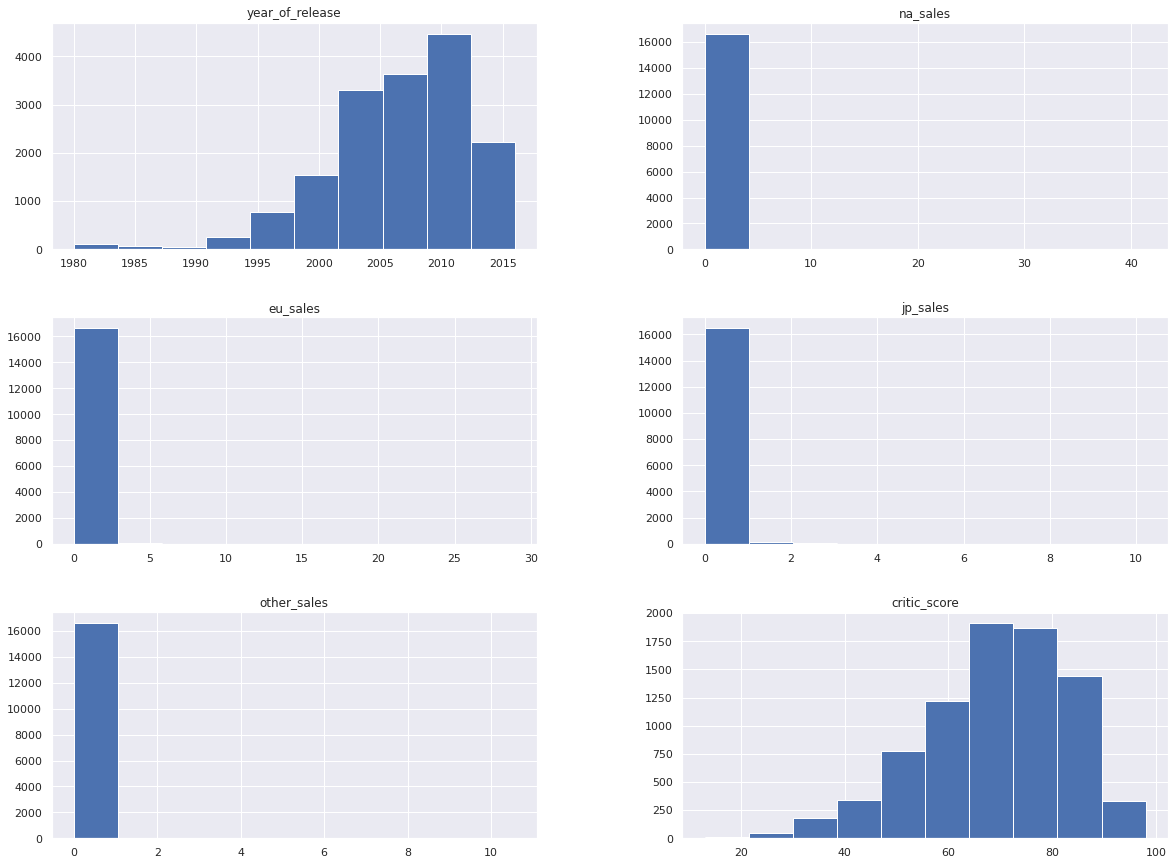

In [4]:
strim4ik_games.hist(figsize=(20, 15));

**Вывод:**

В датасете strim4ik_games присутствует 11 столбцов, он состоит из 16715 наблюдений. Вес 1.4+ MB. 

Дубликаты отсутствуют.

Есть пропуски в столбцах: name, year_of_release, genre, critic_score, user_score, rating. С этим нужно будет разобраться позже.

Названия столбцов в датаcете уже приведены мной выше к нижнему регистру.

В столбце year_of_release тип данных float64 - нужно будет исправить его на int.

В столбце user_score данные хранятся в типе object - нужно будет исправить на числовое значение.

Также, если смотреть на числовые данные, то в столбце year_of_release самая первая игра в датасете выпущена в 1980 году. Если смотреть на квартили, то довольно большое количество игр было выпущено с 2003 по 2010 год.
Если смотреть на следующие три столбца, которые показывают продажи в соответствующих регионах, то на значении в 75% видны достаточно низкие показатели - не больше 0.24 млн. копий. А если смотреть максимальные значения, то это показатель до 41.36 млн. копий и по моему предположению, это может свидетельствовать о выбросах в данных. Значит, есть игры, которые продавались больше всего и есть игры, которые практически не продавались - значения в 0 млн. копий.
По оценкам критиков(столбец critic_score) можно сказать, что минимальная оценка которую они поставили – 13, максимальная оценка - 98.

### Шаг 2. Предобработка данных

***Преобразуем данные в нужные типы и обработаем пропуски.***

**Посмотрим на пропуски в столбце name**

In [7]:
strim4ik_games[strim4ik_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуска всего 2, предлагаю удалить. К тому же, 2 пропуска в столбце genre также относятся к столбцу name.

In [8]:
#Удаляем пропуски.
strim4ik_games = strim4ik_games.dropna(subset = ['name'])

**Проверяем**

In [9]:
strim4ik_games[strim4ik_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Посмотрим столбец year_of_release**

In [10]:
#Смотрим количество пропусков.
strim4ik_games['year_of_release'].isna().sum()

269

В столбце year_of_release пропусков 269 из 16715 наблюдений, что составляет около 1,61% от общего количества. Считаю, что если удалить эти пропуски, это не повлияет на дальнейший анализ данных.

In [11]:
#Удаляем пропуски.
strim4ik_games = strim4ik_games.dropna(subset=['year_of_release'])

In [12]:
#В столбце year_of_release тип данных float64. Исправим тип на int.
strim4ik_games['year_of_release'] = strim4ik_games['year_of_release'].astype('int')

**Посмотрим столбец critic_score**

In [13]:
#Смотрим количество пропусков.
strim4ik_games['critic_score'].isna().sum()

8461

In [14]:
#Посмотрим уникальные значения.
print(strim4ik_games['critic_score'].unique(), sep = '')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


Пропусков очень много. Предлагаю оставить как есть.

**Посмотрим столбец user_score**

In [15]:
#Посмотрим уникальные значения.
print(strim4ik_games['user_score'].unique(), sep = '')

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Тут есть как пропущенные значения, так и аббревиатура tbd(to be determined) - означающая, что рейтинг ещё не присвоен.

In [16]:
#Посмотрим процент строк с аббревиатурой tbd.
len(strim4ik_games[strim4ik_games['user_score'] == 'tbd'])/len(strim4ik_games)

0.14449039163220628

Таких значений почти 14,5%. Поэтому, предлагаю эту аббревиатуру в датасете заменить также на пропуски.

In [17]:
#Заменим значения tbd на пропуски.
strim4ik_games.loc[strim4ik_games['user_score'] == 'tbd', 'user_score'] = None

In [18]:
#В столбце user_score типе данных object. Исправим тип на числовое значение.
strim4ik_games['user_score'] = pd.to_numeric(strim4ik_games['user_score'])

**Посмотрим столбец raiting**

In [19]:
#Смотрим количество пропусков.
strim4ik_games['rating'].isna().sum()

6676

In [20]:
#Посмотрим уникальные значения.
strim4ik_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропусков также очень много. Можно оставить как есть, а можно сделать заглушку, например, на no_rating.

In [21]:
#Заменим пропуски на no_rating.
strim4ik_games['rating'] = strim4ik_games['rating'].fillna('no_rating')

**Проверяем**

In [22]:
strim4ik_games['rating'].isna().sum()

0

In [23]:
#Посмотрим, что получилось при замене.
strim4ik_games['rating'].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
RP              1
AO              1
Name: rating, dtype: int64

Здесь, можно увидеть устаревшие рейтинги у ESRB: K-A(Kids to Adults) и EC(Early Childhood) - сейчас присваивается рейтинг E(Everyone).
Поэтому, предлагаю сделать замену.

In [24]:
#Делаем замену и проверяем.
strim4ik_games.loc[strim4ik_games['rating'] == 'K-A', 'rating'] = 'E'
strim4ik_games.loc[strim4ik_games['rating'] == 'EC', 'rating'] = 'E'
strim4ik_games['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

**Проверим столбцы name и platform на наличие неявных дубликатов**

In [25]:
strim4ik_games[['name', 'platform']].duplicated().sum()

3

**Посмотрим на них**

In [26]:
strim4ik_games[strim4ik_games[['name', 'platform']].duplicated(keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Если верить интернету, то игра Need for Speed: Most Wanted выпускалась и 2005 и в 2012 года как на PC, так и на X360. А вот строки 604 и 16230 дублируют друг друга. Предлагаю удалить строку 16230, так как в ней дается явно меньше информации.

In [27]:
#Удаляем строку.
strim4ik_games = strim4ik_games.drop(index = 16230)

***Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.***

In [28]:
#Считаем суммарные продажи.
strim4ik_games['total_sales'] = strim4ik_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [29]:
#Проверим.
strim4ik_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


**Визуализируем суммарные продажи**

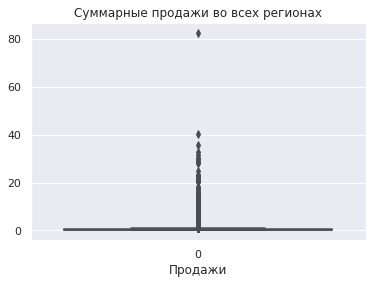

In [30]:
sns.boxplot(data=strim4ik_games['total_sales'])
plt.title('Суммарные продажи во всех регионах')
plt.xlabel('Продажи');

На графике видно, что основные продажи сосредоточены в районе от 0-20 миллиона копий. Есть и отклонения в районе 80 млн.

**Вывод**

Что было сделано:

* Выгрузили данные;
* Привели названия столбцов к нижнему регистру, посмотрели и изменили уникальные значения в столбцах user_score, rating; 
* Удалили пропущенные значения в столбце genre и year_of_release;
* Избавились от неявных дубликатов;
* Добавили столбец суммарных продаж по странам.

### Шаг 3. Проведите исследовательский анализ данных

***Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?***

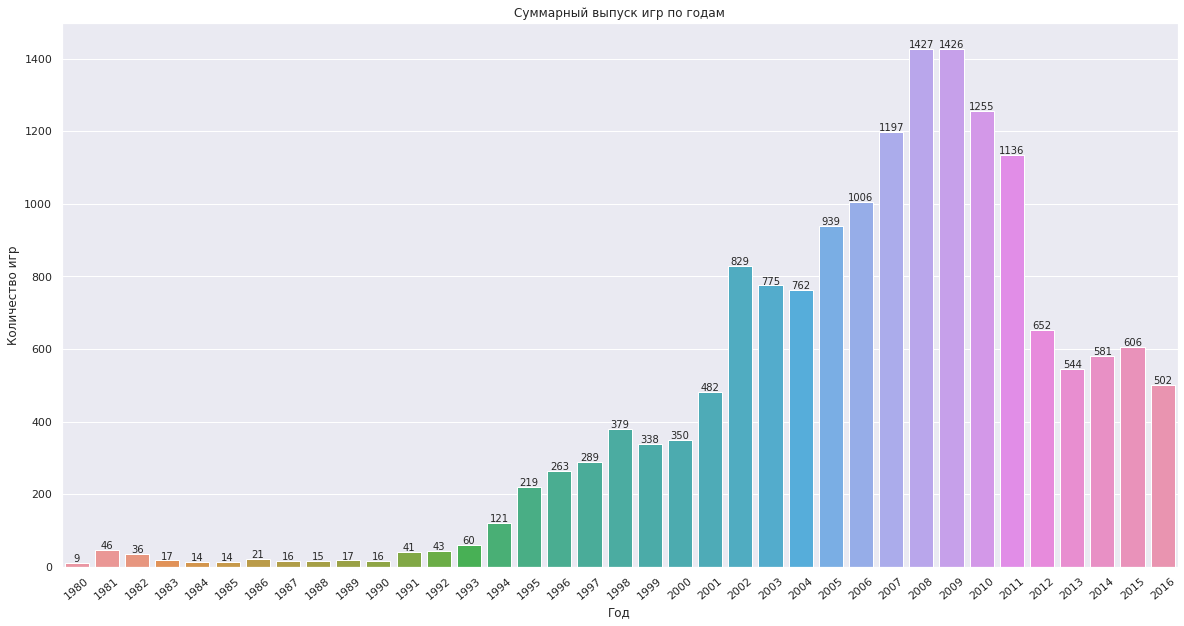

In [31]:
countplot, ax = plt.subplots(figsize = (20, 10))
ax = sns.countplot(x = 'year_of_release', data = strim4ik_games)
plt.title('Суммарный выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 10)
plt.xticks(rotation = 40)
plt.show();

По графику мы можем сделать вывод, что видеоигры начали набирать популярность в 1990-е. Пик выхода приходится на 2008 и 2009 год. Далее виден спад. А  2012 году выход игр сокращается до 652 и к 2016 году приходит на уровень 502 игры.

***Посмотрите, как менялись продажи по платформам.***

Рассмотрим суммарные продажи игр по платформам

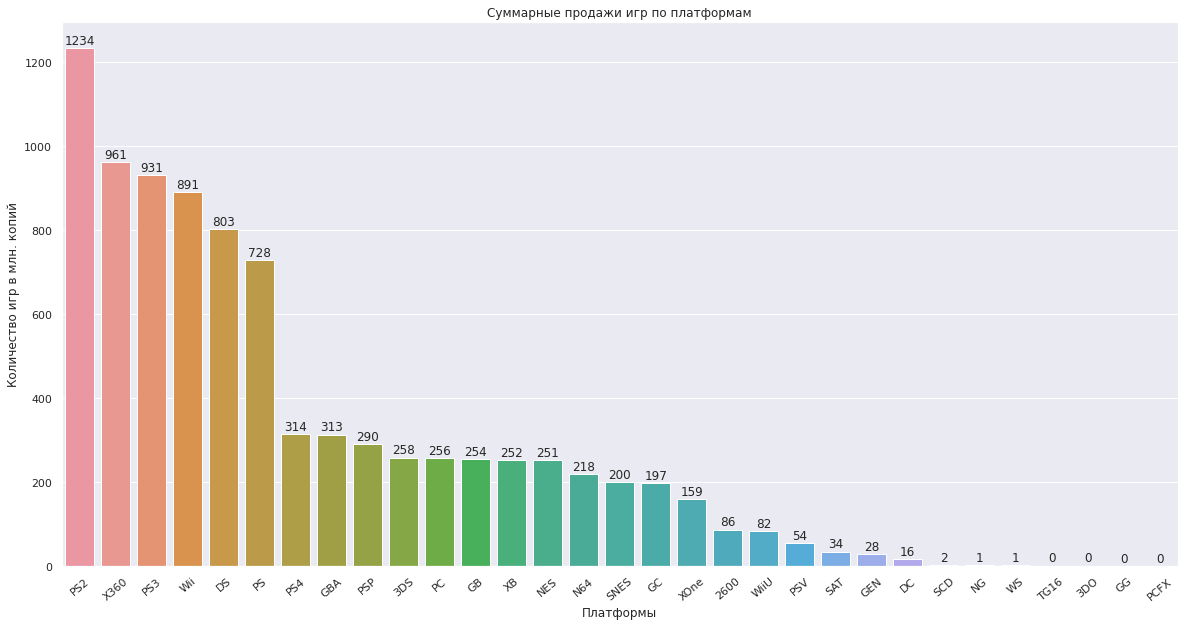

In [32]:
summ_sales_by_platforms = strim4ik_games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
barplot, ax = plt.subplots(figsize = (20, 10))
ax = sns.barplot(x = 'platform', y = 'total_sales', data = summ_sales_by_platforms)
ax.set_title('Суммарные продажи игр по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество игр в млн. копий')
rects = ax.patches
labels = [round(summ_sales_by_platforms['total_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom")
plt.xticks(rotation = 40)
plt.show()

В этом рейтинге PS2 становится лидером - 1.2 млрд. копий. Следом за ней идут X360 и PS3 (961 и 931 млн. копий соответственно). Далее Wii и DS (891 и 803 млн. копий соответственно). Замыкает этот рейтинг PS с 728 млн. копий.

Дальше, у других платформ идет уже сильная просадка по продажам. Но в этой гонке аутсайдеров моя любимая PS4 держится в лидерах (314 млн. копий) :)

**Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.**

Берем шестерку лучших платформ из рейтинга выше: PS2, X360, PS3, Wii, DS, PS и делаем расчеты.

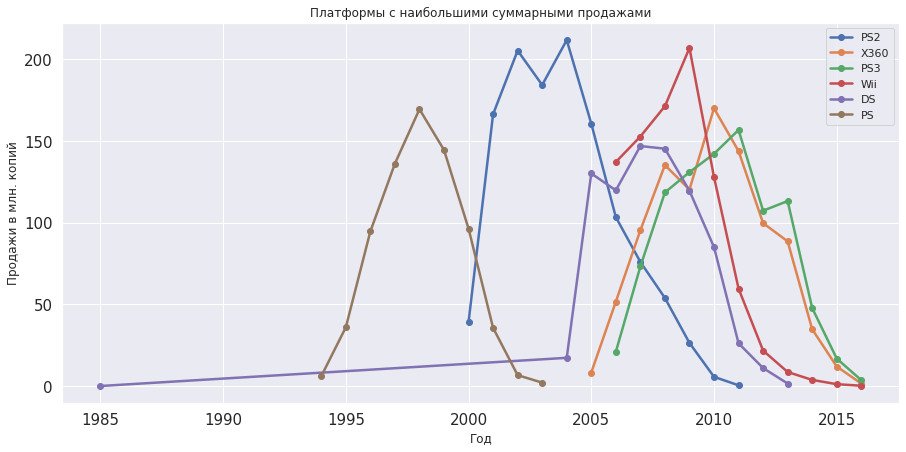

In [33]:
top_platforms_sales = strim4ik_games.pivot_table(index='platform', values='total_sales', aggfunc= 'sum').sort_values(
    'total_sales', ascending=False)
top_platforms = top_platforms_sales.index[:6].tolist()

for top in top_platforms:
    (
        strim4ik_games.loc[strim4ik_games['platform'] == top]
        .groupby('year_of_release')['total_sales']
        .sum()
        .plot(figsize=(15, 7), grid=True, style='o-', kind='line', fontsize=15, linewidth=2.5, legend=True)
    )
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Продажи в млн. копий')
plt.legend(
    ["PS2", "X360", "PS3", "Wii", "DS", "PS"]
)
plt.show();

Очень странный отрезок у DS. Плоская слабовосходящая линия в районе 2004 года резко взмывает вверх. Считаю, что надо проверить, почему так произошло.

In [34]:
#Смотрим, что это за игра.
strim4ik_games.query('platform == "DS" & year_of_release < 2004').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


Получается, что эта игра вышла в 1985 году, скорее всего на ПК. Nintendo DS вышла в 2004 году. Таким образом, тут произошла ошибка и игра не имеет никакого отношения к этой платформе.

Как итог, считаю, что эту ошибочную строку нужно удалить.

In [35]:
#Удаляем ошибочную строку из датасета.
strim4ik_games = strim4ik_games.drop(index=[15957]).reset_index(drop=True)

**Проверим**

In [36]:
#Проверка на удаление строки.
strim4ik_games.query('platform == "DS" & year_of_release < 2004').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


По графикам видно, что в среднем, пик продаж игр приходятся на 3й год выпуска платформы. А выпуск игр на платформе в среднем занимает около 10 лет.

***За какой характерный срок появляются новые и исчезают старые платформы?***

In [37]:
#Группируем данные по платформам и годам.
platform_lifetime = strim4ik_games.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
platform_lifetime.head(30)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


In [38]:
#Посмотрим медианное значение.
platform_lifetime.groupby('platform')['total_sales'].median().median()

17.559999999999995

Медианные продажи по платформам 17.6 млн. копий.

In [39]:
platform_lifetime.query('total_sales > 17.6').groupby(['platform']).agg({'year_of_release':'nunique'}).median()

year_of_release    5.0
dtype: float64

Получается, срок популярности платформ по медиане - 5 лет.

***Возьмите данные за соответствующий актуальный период.***

Для формирования прогноза на 2017 года имеет смысл проводить анализ за последние 2-3 года и с сохранением данных за 2016г.

In [41]:
games_period = strim4ik_games.query('year_of_release >= 2014').copy()

In [42]:
games_period.shape

(1689, 12)

За данный период найдено 1689 записей.

**Построим график зависимости продаж от типа платформ за актуальный период 2014-2016гг.**

Посмотрим сначала на количество игр выпущенных на платформах с 2014-2016гг.

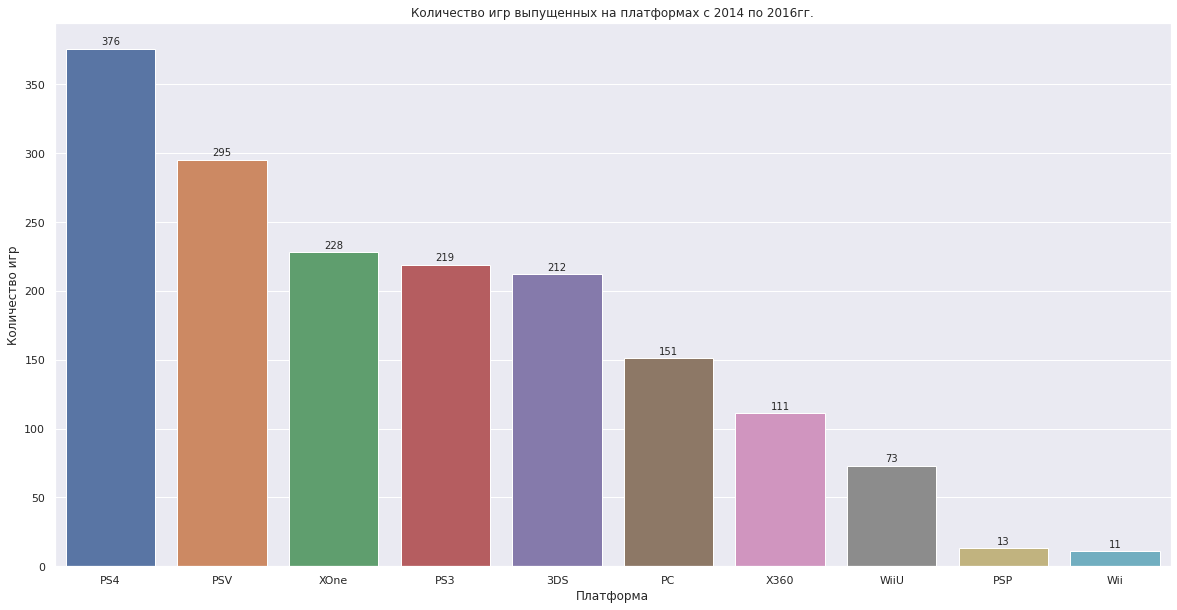

In [43]:
countplt, ax = plt.subplots(figsize = (20, 10))
ax = (sns.countplot(x = 'platform', data = games_period, order = games_period['platform']
                 .value_counts()
                 .index))
ax.set_title('Количество игр выпущенных на платформах с 2014 по 2016гг.')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество игр')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 10)
plt.show();

Из данного графика можно сделать вывод, что за актуальный период лидируют PS4 и PSV. Замыкают рейтинг PSP и Wii.

**Посмотрим на продажи игр выпущенных на платформах с 2014-2016гг.**

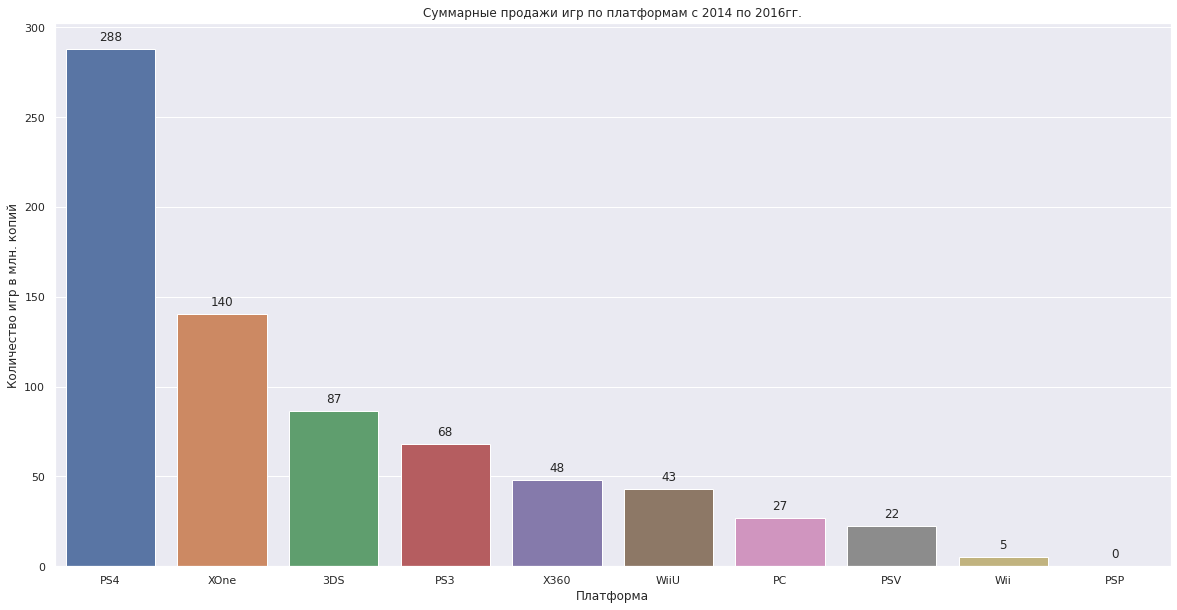

In [44]:
sales_by_period = (games_period.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
        .reset_index())
barplot, ax = plt.subplots(figsize = (20, 10))
ax = sns.barplot(x = 'platform', y = 'total_sales', data = sales_by_period)
ax.set_title('Суммарные продажи игр по платформам с 2014 по 2016гг.')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество игр в млн. копий')
rects = ax.patches
labels = [round(sales_by_period['total_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom")
plt.show();

PS4 лидирует по количеству игр и по продажам. На втором месте XOne - отстает от PS4 в два раза. На третьем месте расположилась 3DS.
На последних местах расположилась Wii и PSP у которой в этот период продаж не было. Видимо теряет популярность, собственно, как и Wii в этот период со своими скромными продажами в 5 млн. копий по сравнению со своими конкурентами на первых местах.

***Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.***

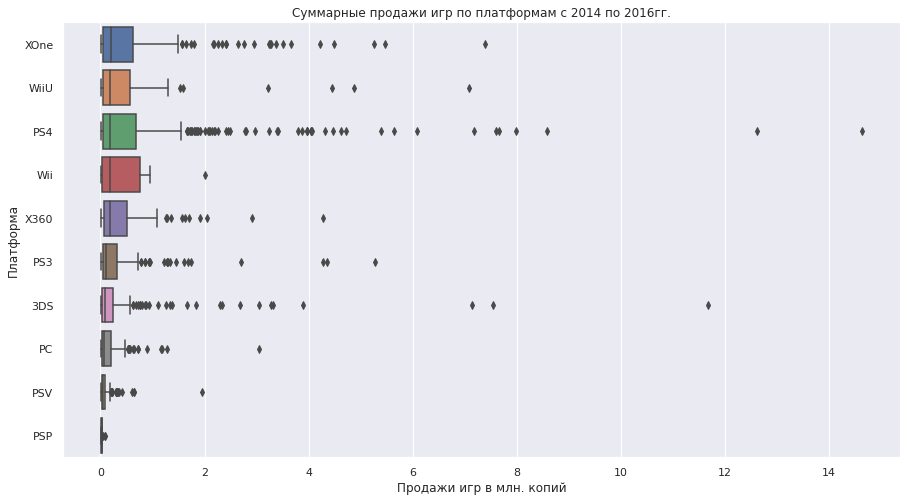

In [45]:
total_sales_box = (games_period.groupby(['platform'])['total_sales'].median().sort_values(ascending=False))
plt.figure(figsize=(15,8))
sns.boxplot(x = 'total_sales', 
            y = 'platform',
            data = games_period,
            order = total_sales_box.index)
plt.title('Суммарные продажи игр по платформам с 2014 по 2016гг.')
plt.xlabel('Продажи игр в млн. копий')
plt.ylabel('Платформа')
plt.show();

Много выбросов на графике, которые мешают разбору данных. Рассмотрим еще раз график более детально.

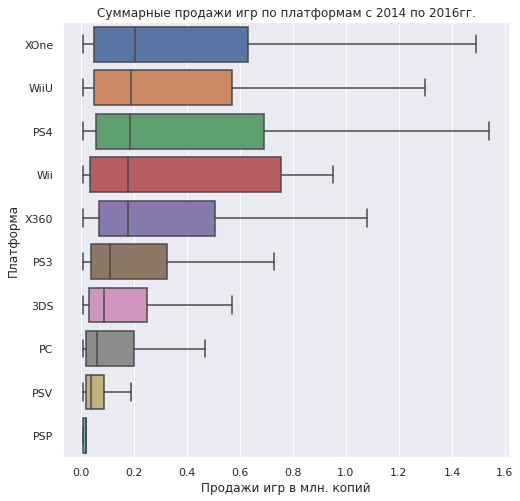

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'total_sales', 
            y = 'platform', 
            data = games_period, 
            showfliers=False, 
            order=total_sales_box.index)
plt.title('Суммарные продажи игр по платформам с 2014 по 2016гг.')
plt.xlabel('Продажи игр в млн. копий')
plt.ylabel('Платформа')
plt.show();

Тут видно, что за данный период самые большие продажи у PS4 и Wii. Далее, чуть меньше у XOne. На остальных платформах продажи ещё меньше. Возможно из-за большого количества выбросов в данных, что может говорить о большом разбросе доходов по платформам.

***Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.***

Построим диаграммы рассеяния для зависимости продаж от оценок критиков для PS4 и PSV в актуальный период.

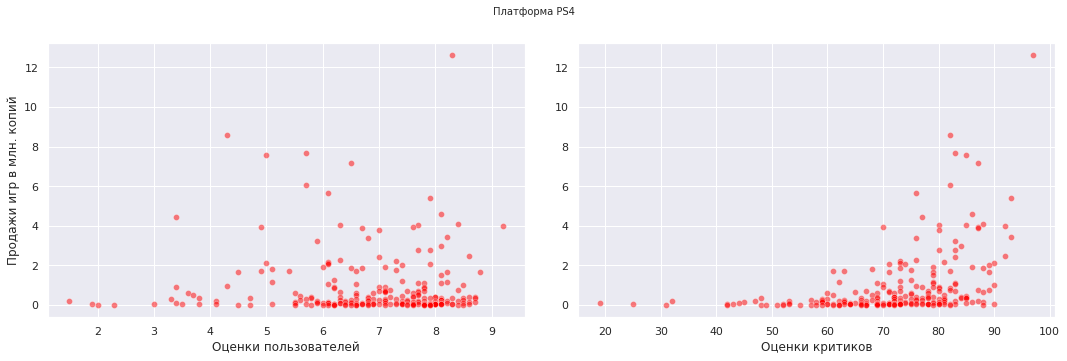

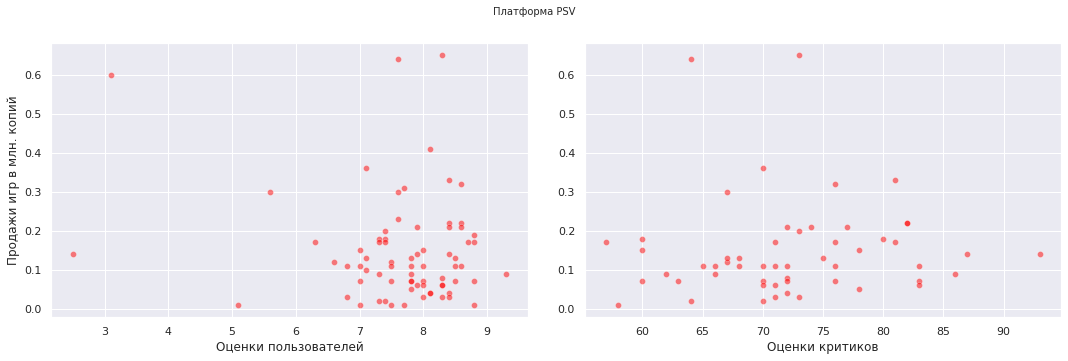

In [47]:
for platform in ['PS4', 'PSV']:
    strim4ik_games = games_period[games_period['platform'] == platform]
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    plt.suptitle(f'Платформа {platform}', fontsize=10, y=1)
    sns.scatterplot(data=strim4ik_games, x='user_score', y='total_sales', color = 'red', alpha=0.5, ax=ax1)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи игр в млн. копий')
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=strim4ik_games, x='critic_score', y='total_sales', color = 'red', alpha=0.5, ax=ax2)
    plt.xlabel('Оценки критиков')
    plt.ylabel(' ')
    plt.tight_layout()
    plt.show();

Чаще, игры оценивались в 5,5-8,5 баллов у пользователей и приблизительно 60-90 баллов у критиков для PS4. 

Для PSV от 7 до почти 9 баллов у пользователей и от 65 до почти 85 у критиков. Только единицы получали 90 баллов и выше.

В целом, при рассмотрении оценок критиков имеется корреляция с продажами. У оценок пользователей нет корреляции с продажами.

**Посмотрим коэффициенты корреляции**

*Посмотрим для платформы PS4*

In [48]:
PS4_games = games_period.query('platform == "PS4"')
correlation = PS4_games[['critic_score', 'user_score', 'total_sales']].corr()
pd.options.display.float_format = '{:,.2f}'.format
correlation

,critic_score,user_score,total_sales
critic_score,1.00,0.55,0.40
user_score,0.55,1.00,-0.04
total_sales,0.40,-0.04,1.00


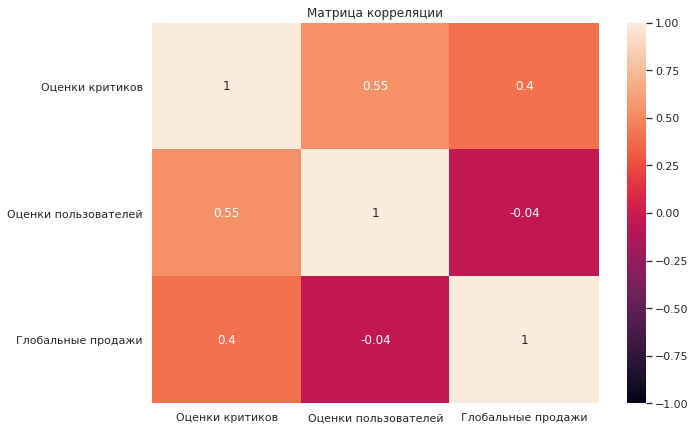

In [49]:
correlation = PS4_games[['critic_score', 'user_score', 'total_sales']].corr()

correlation_labels = ['Оценки критиков', 'Оценки пользователей', 'Глобальные продажи']

plt.figure(figsize=(10, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, yticklabels=correlation_labels, xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show();

Связь между оценкой пользователей и продажами игр отсутствует.

Есть связь между оценкой критиков и продажами. 

Это может говорить нам о влиянии отзывов критиков на продажи.

*Посмотрим для платформы PSV*

In [50]:
PSV_games = games_period.query('platform == "PSV"')
correlation = PSV_games[['critic_score', 'user_score', 'total_sales']].corr()
pd.options.display.float_format = '{:,.2f}'.format
correlation

,critic_score,user_score,total_sales
critic_score,1.00,0.52,0.04
user_score,0.52,1.00,-0.17
total_sales,0.04,-0.17,1.00


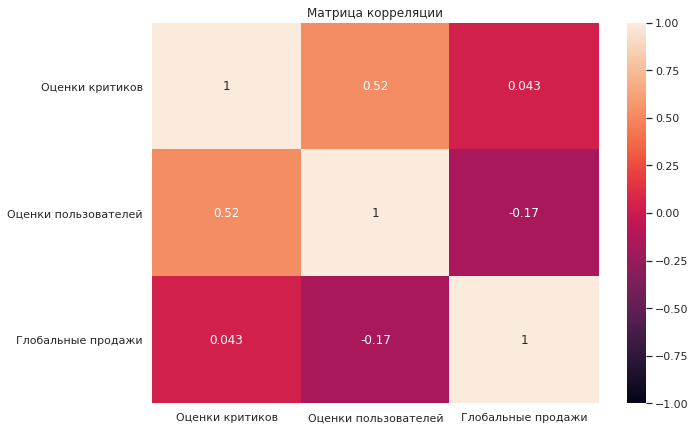

In [51]:
correlation = PSV_games[['critic_score', 'user_score', 'total_sales']].corr()

correlation_labels = ['Оценки критиков', 'Оценки пользователей', 'Глобальные продажи']

plt.figure(figsize=(10, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, yticklabels=correlation_labels, xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show();

В целом, такая же картина, как и с PS4.

**Соотнесите выводы с продажами игр на других платформах.**

*Посмотрим количество оценок игр критиками на каждой платформе.*

In [52]:
(games_period.groupby('platform')['critic_score'].count().sort_values(ascending=False))

platform
PS4     237
XOne    155
PC      116
PSV      54
3DS      51
WiiU     43
PS3      36
X360     26
PSP       0
Wii       0
Name: critic_score, dtype: int64

Здесь лидирует PS4 - 237 оценок критиков. PSV идет на четвертом месте - 54 оценки.

*Посмотрим средние оценки игр критиками на каждой платформе.*

In [53]:
(games_period.groupby('platform')['critic_score'].mean().sort_values(ascending=False))

platform
PC     76.22
XOne   73.79
PSV    72.26
PS4    72.16
WiiU   71.19
3DS    68.98
PS3    66.56
X360   63.73
PSP      NaN
Wii      NaN
Name: critic_score, dtype: float64

Здесь в лидерах PC - 76,21. PSV и PS4 делят между собой 3 и 4 место соответственно.

Надо рассмотреть корреляцию отдельно по платформе PC.

*Рассмотрим корреляцию по платформе PC*

In [54]:
PC_corr = games_period.query('platform == "PC"')[['critic_score', 'user_score', 'total_sales']].corr()
pd.options.display.float_format = '{:,.2f}'.format
PC_corr

,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.17
user_score,0.47,1.00,-0.07
total_sales,0.17,-0.07,1.00


**Визуализируем**

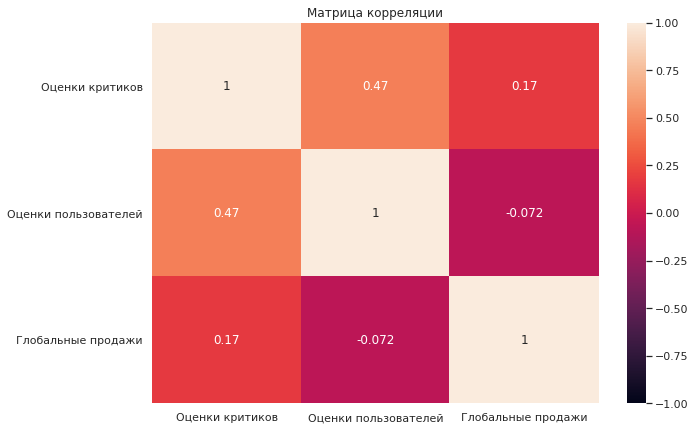

In [55]:
PC_corr = games_period.query('platform == "PC"')[['critic_score', 'user_score', 'total_sales']].corr()

correlation_labels = ['Оценки критиков', 'Оценки пользователей', 'Глобальные продажи']

plt.figure(figsize=(10, 7))
sns.heatmap(PC_corr, vmin=-1, vmax=1, annot=True, yticklabels=correlation_labels, xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show();

Коэффициент корреляции между отзывами критиков и продажами для платформы PC сильно ниже, чем для SP4 и SPV.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

*Построим график распределения продаж игр по жанрам*

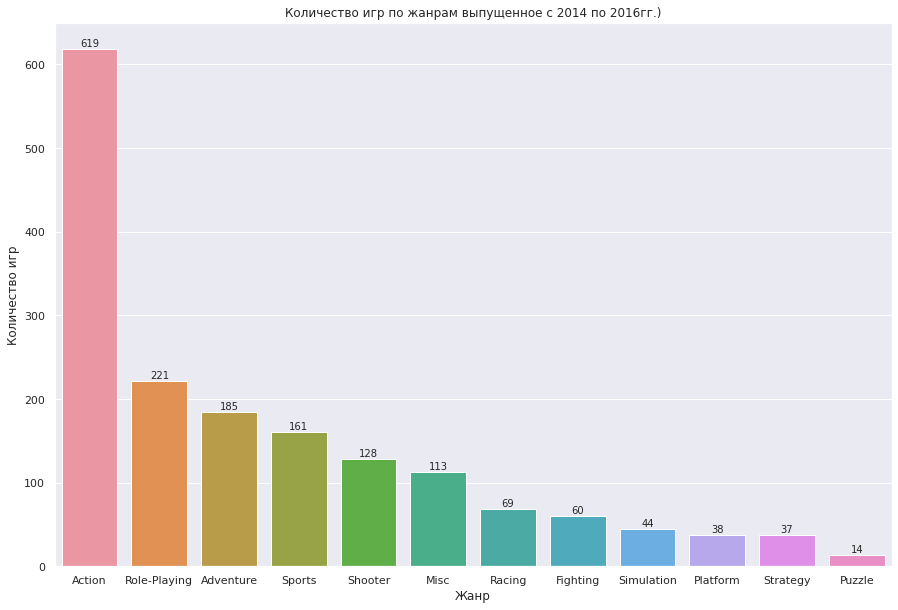

In [56]:
countplt, ax = plt.subplots(figsize = (15, 10))
ax = (sns.countplot(x = 'genre', data = games_period, order = games_period['genre'].value_counts().index))
ax.set_title('Количество игр по жанрам выпущенное с 2014 по 2016гг.)')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество игр')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 10)
plt.show();

За актуальный период на первом месте жанр в стиле Action - выпущено 619 игр. На втором месте жанр Role-Playing - 221 игра. Замыкает лидерство жанр Puzzle - всего 14 игр.

**Посмотрим график продаж по жанрам.**

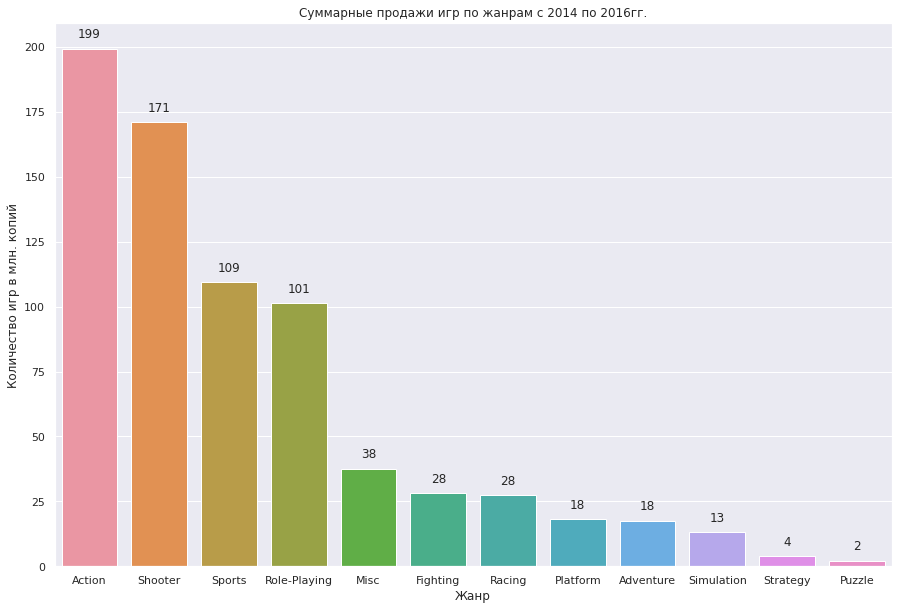

In [57]:
sales_by_genre = (games_period.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index())
barplot, ax = plt.subplots(figsize = (15, 10))
ax = sns.barplot(x = 'genre', y = 'total_sales', data = sales_by_genre)
ax.set_title('Суммарные продажи игр по жанрам с 2014 по 2016гг.')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество игр в млн. копий')
rects = ax.patches
labels = [round(sales_by_genre['total_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom")
plt.show();

Здесь видно, что жанр Action всё ещё лидирует - 199 млн. игр. На втором месте жанр Shooter - 171 игр. Последние места делят жанры Strategy и Puzzle с 4 млн. и 2 млн. копий соответственно.

**Посмотрим продажи игр по жанрам в медиане**

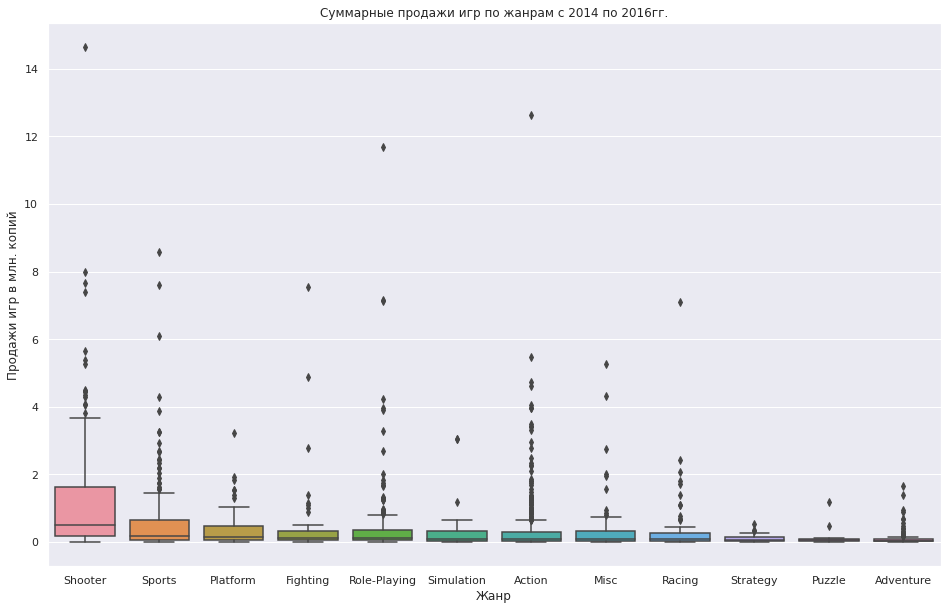

In [58]:
median_sales_by_genre = (games_period.groupby(['genre'])['total_sales'].median().sort_values(ascending=False))
plt.figure(figsize=(16, 10))
sns.boxplot(x = 'genre', y = 'total_sales', data = games_period, order = median_sales_by_genre.index)
plt.title('Суммарные продажи игр по жанрам с 2014 по 2016гг.')
plt.xlabel('Жанр')
plt.ylabel('Продажи игр в млн. копий')
plt.show();

**Посмотрим с другим масштабом.**

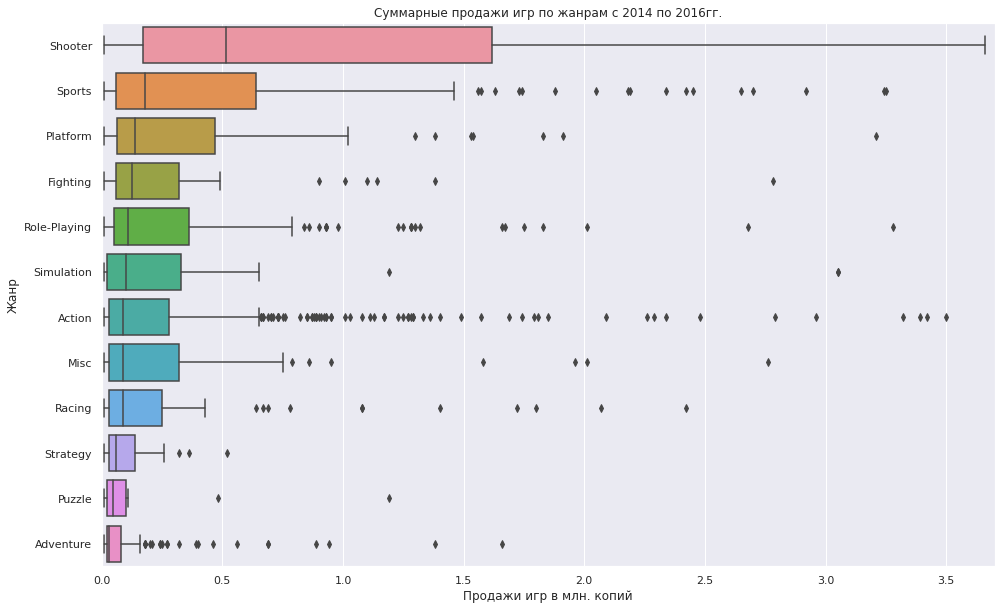

In [59]:
median_sales_by_genre = (games_period.groupby(['genre'])['total_sales'].median().sort_values(ascending=False))
plt.figure(figsize=(16, 10))
sns.boxplot(x = 'total_sales', y = 'genre', data = games_period, order = median_sales_by_genre.index)
plt.title('Суммарные продажи игр по жанрам с 2014 по 2016гг.')
plt.xlabel('Продажи игр в млн. копий')
plt.ylabel('Жанр')
plt.xlim(0, 3.7)
plt.show();

Здесь видно, что жанр Shooter лидирует - около 1,6 млн. копий, а вот Action теперь на седьмом месте.

Замыкает рейтинг жанры Puzzle и Adventure.

**Вывод**

Подводя итог, можно сказать, что для формирования прогноза на 2017 года имеет смысл проводить анализ за последние 2-3 года с сохранением данных за 2016г. Был выбран период с 2014 года по 2016 год включительно.

За актуальный период, PS4 лидирует по количеству выпущенных игр и по продажам - 376 и 288 соответственно.

Чаще, игры оценивались в 5,5-8,5 баллов у пользователей и приблизительно 60-90 баллов у критиков для PS4.

Для PSV от 7 до почти 9 баллов у пользователей и от 65 до почти 85 у критиков. Только единицы получали 90 баллов и выше.

В целом, при рассмотрении оценок критиков имеется корреляция с продажами. У оценок пользователей нет корреляции с продажами.

Если смотреть на оценки, в частности на платформу PS4 - 237 оценок критиков (средняя оценка по всему списку платформ - 72.16), то связь между оценкой пользователей и продажами игр на этой платформе отсутствует.
Есть связь между оценкой критиков и продажами. Это может говорить нам о влиянии отзывов критиков на продажи. Приблизительно такая же картина и у PSV. У PSV - 54 оценок критиков (средняя оценка из всего списка платформ - 72.25).

По жанрам можно сказать, что за актуальный период на первом месте жанр в стиле Action - выпущено 619 игр. На втором месте жанр Role-Playing - 221 игра. Замыкает лидерство жанр Puzzle - всего 14 игр.

По суммарным продажам видно, что жанр Action всё ещё лидирует - 199 млн. игр. На втором месте жанр Shooter - 171 игр. Последние места делят жанры Strategy и Puzzle с 4 млн. и 2 млн. копий соответственно.

По медианным данным, теперь жанр Shooter лидирует - около 1,6 млн. копий, а вот Action теперь на седьмом месте.

### Шаг 4. Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

*Самые популярные платформы (топ-5) в представленных регионах:*

In [60]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5 = (games_period.pivot_table(index='platform', values=[region, 'total_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top5['region'] = round(top5[region]/top5[region].sum()*100,1)
    top5['global'] = round(top5[region]/top5['total_sales']*100,1)
    print(f'\n\033[1;34m Сравнение популярности платформ в регионе {region.upper()[:2]} \033[0m')
    display(top5[['platform', 'region', 'global']].head())


 Сравнение популярности платформ в регионе NA 


,platform,region,global
0,PS4,34.70,34.20
1,XOne,28.60,57.90
2,X360,10.00,58.70
3,3DS,8.00,26.10
4,PS3,7.80,32.30



 Сравнение популярности платформ в регионе EU 


,platform,region,global
0,PS4,48.00,45.10
1,XOne,17.10,33.00
2,PS3,9.40,37.50
3,PC,6.60,66.40
4,3DS,6.00,18.60



 Сравнение популярности платформ в регионе JP 


,platform,region,global
0,3DS,47.50,51.00
1,PS4,16.10,5.20
2,PSV,15.60,64.90
3,PS3,12.10,16.50
4,WiiU,7.90,17.00


**Напишем функцию и построим график**

In [61]:
def graph (df, region, name, axes):  
    df = games_period
    sales = df.pivot_table(index='platform', values=region, aggfunc='sum').nlargest(5, region)
    sales = sales.reset_index()
    sales = (sales.append({'platform': 'Другие', region: df[region].sum() - sales[region].sum()}, ignore_index= True))
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y='sales',
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'fontsize':12}, 
               labels = sales.platform,
               legend=False, 
               title = f'Популярность платформ в {name}', 
               ax = axes).set(ylabel='')
    plt.tight_layout()

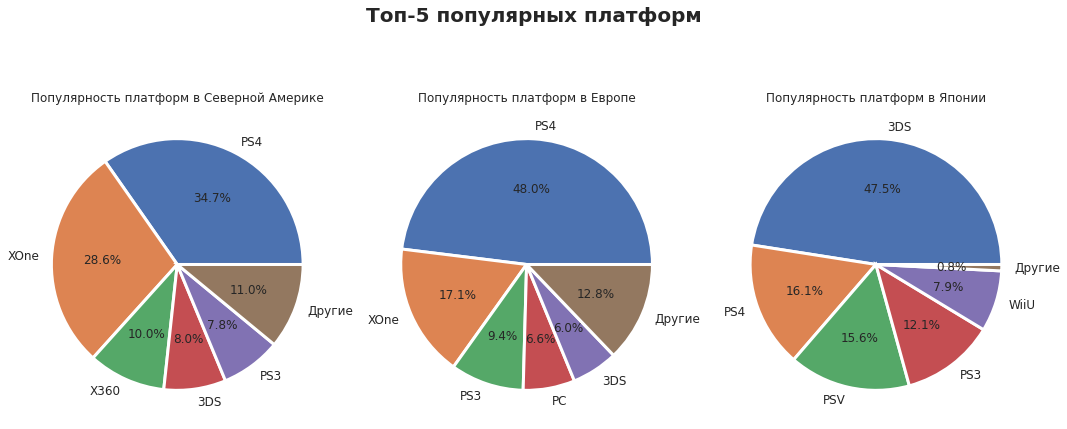

In [62]:
fig, axes = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle('Топ-5 популярных платформ', fontsize = 20, fontweight='bold')

graph(games_period, 'na_sales', 'Северной Америке', axes[0])
graph(games_period, 'eu_sales', 'Европе', axes[1])
graph(games_period, 'jp_sales', 'Японии', axes[2])

В Северной Америке лидирует PS4 - 34,7%. На втором месте с некоторым отставанием идет XOne - 28,6%. Другие платформы - 11,0%. Меньше всего игр продаётся на платформах X360(10%), 3DS(8%) и PS3(7,8%).

В Европе также лидирует PS4 - 48%. На втором месте также расположилась XOne - 17,1%. Другие платформы - 12,8%. И замыкает рейтинг PS3(9,4%), PC(6,6%) и 3DS(6%).

В Японии в лидерах 3DS - 47,5%. На втором месте PS4(16,1%) и с небольшим отставанием рядом с ней находится PSV(15,6%). Замыкает рейтинг PS3(12,1%) и с большим отставанием на последнем месте WiiU(7,9%). Другие платформы - 0,8%.

**Опишите различия в долях продаж.**

In [63]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5 = (games_period
           .pivot_table(index='genre', values=[region, 'total_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top5['region'] = round(top5[region]/top5[region].sum()*100,1)
    top5['global'] = round(top5[region]/top5['total_sales']*100,1)
    print(f'\n\033[1;34m Доля продаж игр на топ-5 платформах в регионах {region.upper()[:2]} \033[0m')
    display(top5[['genre', 'region', 'global']].head())


 Доля продаж игр на топ-5 платформах в регионах NA 


,genre,region,global
0,Shooter,27.80,46.20
1,Action,25.50,36.40
2,Sports,16.20,42.10
3,Role-Playing,11.80,33.00
4,Misc,5.30,40.10



 Доля продаж игр на топ-5 платформах в регионах EU 


,genre,region,global
0,Action,27.60,37.50
1,Shooter,24.20,38.30
2,Sports,16.90,41.80
3,Role-Playing,10.40,27.80
4,Racing,5.20,51.30



 Доля продаж игр на топ-5 платформах в регионах JP 


,genre,region,global
0,Role-Playing,33.50,30.70
1,Action,31.80,14.80
2,Fighting,6.80,22.60
3,Misc,6.00,14.90
4,Shooter,5.20,2.80


In [64]:
def graph (df, region, name, axes):  
    df = games_period
    sales = df.pivot_table(index='genre', values=region, aggfunc='sum').nlargest(5, region)
    sales = sales.reset_index()
    sales = (sales.append({'genre': 'Другие', region: df[region].sum() - sales[region].sum()}, ignore_index= True))
    sales.columns = ['genre', 'sales']
    sales.plot(kind='pie',
               y='sales',
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'fontsize':12}, 
               labels = sales.genre,
               legend=False, 
               title = f'Доля продаж в {name}', 
               ax = axes).set(ylabel='')
    plt.tight_layout()

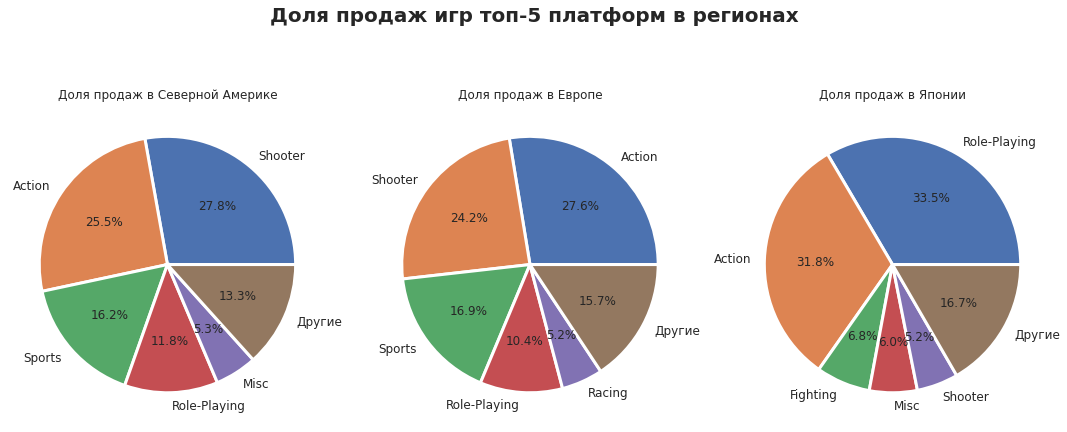

In [65]:
fig, axes = plt.subplots(1, 3, figsize = (15, 7))
fig.suptitle('Доля продаж игр топ-5 платформ в регионах', fontsize = 20, fontweight='bold')

graph(games_period, 'na_sales', 'Северной Америке', axes[0])
graph(games_period, 'eu_sales', 'Европе', axes[1])
graph(games_period, 'jp_sales', 'Японии', axes[2])

Видно, что в Северной Америке и Европе на первых двух местах почти схожие доли, только предпочтения в жанрах разные. В Северной Америке, Shooter имеет долю 27,8%, жанр Action - 25.5%. В Европе, Action имеет долю 27,6%, жанр Shooter - 24,2%.

В Японии очень популярен жанр Role-Playing - 33,5%. От него не сильно отстает жанр Action - 31,8%(доля даже больше чем в Северной Америке).

***Влияет ли рейтинг ESRB на продажи в отдельном регионе?***

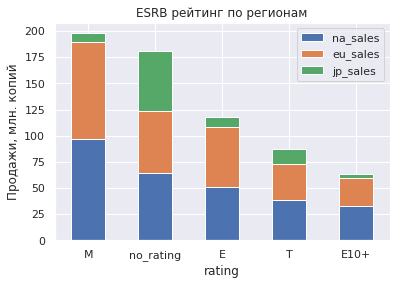

In [66]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
rating = games_period.groupby('rating')[regions].sum()
rating['total_sales'] = rating.sum(axis=1)
rating.sort_values('total_sales', ascending=False)[regions].plot.bar(stacked=True, rot=0)
plt.ylabel('Продажи, млн. копий')
plt.title('ESRB рейтинг по регионам')
plt.show();

Расшифровка рейтинга ESRB:

* M («Mature») — «Для взрослых»;
* E («Everyone») — «Для всех»;
* T («Teen») — «Подросткам»;
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше».

no_rating - мы заменили в колонке rating для пропусков и там где рейтинг был не назначен.

Доли продаж по рейтингам схожи между Северной Америкой и Европой. Довольно большая часть продаж идет по рейтингу М. Далее, идут игры без рейтинга, потом по рейтингу E. Замыкает топ рейтинг Т и Е10+.

Если смотреть отдельно на Японию, то в лидерах находятся игры без рейтинга. Вообще, много игр без рейтинга. ESRB - это организация США и Канады и скорее всего, не для территории Японии. На втором и третьем месте рейтинг Т и Е соответственно. Замыкает топ рейтинг М и Е10+.

**Вывод**

Портрет пользователя в Северной Америке:

В рейтинге по самым популярным платформам лидирует PS4 - 34,7%. На втором месте с некоторым отставанием идет XOne - 28,6%. Другие платформы - 11,0%. Меньше всего игр продаётся на платформах X360(10%), 3DS(8%) и PS3(7,8%).

Различия в долях продаж таковы, что здесь Shooter на первом месте и имеет долю 27,8%, жанр Action на втором месте - 25.5%.

В долях продаж по рейтингам, довольно большая часть продаж идет по рейтингу М. Далее, идут игры без рейтинга, потом по рейтингу E. Замыкает топ рейтинг Т и Е10+.

Портрет пользователя в Европе:

В рейтинге по самым популярным платформам лидирует PS4 - 48%. На втором месте также расположилась XOne - 17,1%. Другие платформы - 12,8%. И замыкает рейтинг PS3(9,4%), PC(6,6%) и 3DS(6%).

По различиям в долях продаж видно, что жанр Action имеет долю 27,6%, жанр Shooter - 24,2%.

В долях продаж по рейтингам, в целом, ситуация идентична с Северной Америкой. Большая часть продаж идет по рейтингу М. Далее, идут игры без рейтинга, потом по рейтингу E. Замыкает топ рейтинг Т и Е10+.


Портрет пользователя в Японии:

В рейтинге по самым популярным платформам в лидерах 3DS - 47,5%. На втором месте PS4(16,1%) и с небольшим отставанием рядом с ней находится PSV(15,6%). Замыкает рейтинг PS3(12,1%) и с большим отставанием на последнем месте WiiU(7,9%). Другие платформы - 0,8%.

По различиям в долях продаж видно, что здесь очень популярен жанр Role-Playing - 33,5%. От него не сильно отстает жанр Action - 31,8%(доля даже больше чем в Северной Америке).

Если смотреть в долях продаж по рейтингам, то в лидерах находятся игры без рейтинга. Вообще, много игр без рейтинга. ESRB - это организация США и Канады и скорее всего, не для территории Японии. На втором и третьем месте рейтинг Т и Е соответственно. Замыкает топ рейтинг М и Е10+.

Из данных выше можно сказать, что влияние рейтингов есть только в Северной Америке и Европе. В Японии рейтинги ESRB не влияет на продажи.

### Шаг 5. Проверьте гипотезы

**Гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [67]:
XOne = games_period.query('platform == "XOne"').dropna(subset=['user_score'])
PC = games_period.query('platform == "PC"').dropna(subset=['user_score'])

In [68]:
print('Выборка для платформы \033[1;30mXOne:\033[0m', len(XOne))
print('Выборка для платформы \033[1;30mPC:\033[0m', len(PC))

Выборка для платформы XOne: 165
Выборка для платформы PC: 122


**Посчитаем средний рейтинг для обеих платформ**

In [69]:
XOne = (games_period[(games_period['platform'] == 'XOne') & (games_period['user_score'] > 0)]['user_score'])
PC = games_period[(games_period['platform'] == 'PC') & (games_period['user_score'] > 0)]['user_score']

In [70]:
print(f'Средний рейтинг для платформы XOne: {round(XOne.mean(), 2)}')
print(f'Средний рейтинг для платформы PC: {round(PC.mean(), 2)}')

Средний рейтинг для платформы XOne: 6.59
Средний рейтинг для платформы PC: 6.3


**Проверим гипотезу**

In [71]:
alpha = 0.05 

results = st.ttest_ind(XOne, PC, equal_var=False) 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Создали две выборки с рейтингами пользователей для обеих платформ и избавились от отсутствующих значений.

Средние рейтинга для платформ находятся приблизительно на одном уровне.

Для проверки гипотезы был использован t-тест (scipy.stats.ttest_ind()). Уровень статистической значимости применяем равным 5%.

По имеющимся данным, на уровне значимости 5% нет основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов по платформам XOne и PC в пользу альтернативной гипотезы.

**Гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные.**

Сформулируем нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [73]:
Action = games_period.query('genre == "Action"').dropna(subset=['user_score'])
Sports = games_period.query('genre == "Sports"').dropna(subset=['user_score'])

In [74]:
print('Выборка для жанра Action:', len(Action))
print('Выборка для жанра Sports:', len(Sports))

Выборка для жанра Action: 297
Выборка для жанра Sports: 127


**Посчитаем средний рейтинг для обоих жанров**

In [75]:
Action = games_period[(games_period['genre'] == 'Action') & (games_period['user_score'] > 0)]['user_score']
Sports = games_period[(games_period['genre'] == 'Sports') & (games_period['user_score'] > 0)]['user_score']

In [76]:
print(f'Средний рейтинг для жанра Action: {round(Action.mean(), 2)}')
print(f'Средний рейтинг для жанра Sports: {round(Sports.mean(), 2)}')

Средний рейтинг для жанра Action: 6.76
Средний рейтинг для жанра Sports: 5.23


**Проверим гипотезу**

In [77]:
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var=False) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Создали две выборки с рейтингами пользователей по указанным жанрам и избавились от отсутствующих значений.

Есть различия по выборкам.

Для проверки гипотезы был использован t-тест (scipy.stats.ttest_ind()). Уровень статистической значимости применяем равным 5%.

По имеющимся данным, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов по жанрам Action и Sports в пользу альтернативной гипотезы.

**Вывод**

Для первой гипотезы было установлено пороговое значение alpha = 0.05. Для различий в размерах выборок был использован параметр equal_var = False.

Так как по результатам теста значение p-value превысило уровень статистической значимости, была принята нулевая гипотеза о равенстве средних пользовательских рейтингов платформ XOne и PC.

Средний рейтинг для платформы XOne: 6.59

Средний рейтинг для платформы PC: 6.3


Для второй гипотезы также было установлено пороговое значение alpha = 0.05. Для различий в размерах выборок был использован параметр equal_var = False.

Так как по результатам теста значение p-value ниже уровня статистической значимости, была отвергнута нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.

Средний рейтинг для жанра Action: 6.76

Средний рейтинг для жанра Sports: 5.23

### Шаг 6. Напишите общий вывод

**При загрузке данных**, в датасете strim4ik_games присутствует 11 столбцов, он состоит из 16715 наблюдений. Вес 1.4+ MB. 

Дубликаты отсутствуют.

Есть пропуски в столбцах: name, year_of_release, genre, critic_score, user_score, rating.

Названия столбцов в датаcете были приведены к нижнему регистру.

В столбце year_of_release тип данных float64 - исправили на int.

В столбце user_score данные хранились в типе object - исправили на числовое значение.

Также, если смотреть на числовые данные, то в столбце year_of_release самая первая игра в датасете выпущена в 1980 году. Если смотреть на квартили, то довольно большое количество игр было выпущено с 2003 по 2010 год.
Если смотреть на следующие три столбца, которые показывают продажи в соответствующих регионах, то на значении в 75% видны достаточно низкие показатели - не больше 0.24 млн. копий. А если смотреть максимальные значения, то это показатель до 41.36 млн. копий и это может свидетельствовать о выбросах в данных. Значит, есть игры, которые продавались больше всего и есть игры, которые практически не продавались - значения в 0 млн. копий.
По оценкам критиков(столбец critic_score) можно сказать, что минимальная оценка которую они поставили – 13, максимальная оценка - 98.

**При обработке данных было сделано:**

* Выгрузили данные;
* Привели названия столбцов к нижнему регистру, посмотрели и изменили уникальные значения в столбцах user_score, rating;
* Удалили пропущенные значения в столбце genre и year_of_release;
* Избавились от неявных дубликатов;
* Добавили столбец суммарных продаж по странам.

**При проведение исследовательского анализа можно сказать,** что для формирования прогноза на 2017 года было решено проводить анализ за последние 2-3 года с сохранением данных за 2016г. Был выбран период с 2014 года по 2016 год включительно.

За актуальный период, PS4 лидирует по количеству выпущенных игр и по продажам - 376 и 288 соответственно.

Чаще, игры оценивались в 5,5-8,5 баллов у пользователей и приблизительно 60-90 баллов у критиков для PS4.

Для PSV оценки от 7 до почти 9 баллов у пользователей и от 65 до, почти, 85 баллов у критиков. Только единицы получали 90 баллов и выше.

В целом, при рассмотрении оценок критиков имеется корреляция с продажами. У оценок пользователей нет корреляции с продажами.

Если смотреть на оценки, в частности на платформу PS4 - 237 оценок критиков (средняя оценка по всему списку платформ - 72.16), то связь между оценкой пользователей и продажами игр на этой платформе отсутствует. Есть связь между оценкой критиков и продажами. Это может говорить нам о влиянии отзывов критиков на продажи. Приблизительно такая же картина и у PSV. У PSV - 54 оценок критиков (средняя оценка из всего списка платформ - 72.25).

По жанрам можно сказать, что за актуальный период на первом месте жанр в стиле Action - выпущено 619 игр. На втором месте жанр Role-Playing - 221 игра. Замыкает лидерство жанр Puzzle - всего 14 игр.

По суммарным продажам видно, что жанр Action всё ещё лидирует - 199 млн. игр. На втором месте жанр Shooter - 171 игр. Последние места делят жанры Strategy и Puzzle с 4 млн. и 2 млн. копий соответственно.

По медианным данным, теперь, жанр Shooter лидирует - около 1,6 млн. копий, а вот Action теперь на седьмом месте.

**При составлении портрета пользователя каждого региона было выявлено:**

Портрет пользователя в Северной Америке:

В рейтинге по самым популярным платформам лидирует PS4 - 34,7%. На втором месте с некоторым отставанием идет XOne - 28,6%. Другие платформы - 11,0%. Меньше всего игр продаётся на платформах X360(10%), 3DS(8%) и PS3(7,8%).

Различия в долях продаж таковы, что здесь Shooter на первом месте и имеет долю 27,8%, жанр Action на втором месте - 25.5%.

В долях продаж по рейтингам, довольно большая часть продаж идет по рейтингу М. Далее, идут игры без рейтинга, потом по рейтингу E. Замыкает топ рейтинг Т и Е10+.

Портрет пользователя в Европе:

В рейтинге по самым популярным платформам лидирует PS4 - 48%. На втором месте также расположилась XOne - 17,1%. Другие платформы - 12,8%. И замыкает рейтинг PS3(9,4%), PC(6,6%) и 3DS(6%).

По различиям в долях продаж видно, что жанр Action имеет долю 27,6%, жанр Shooter - 24,2%.

В долях продаж по рейтингам, в целом, ситуация идентична с Северной Америкой. Большая часть продаж идет по рейтингу М. Далее, идут игры без рейтинга, потом по рейтингу E. Замыкает топ рейтинг Т и Е10+.

Портрет пользователя в Японии:

В рейтинге по самым популярным платформам в лидерах 3DS - 47,5%. На втором месте PS4(16,1%) и с небольшим отставанием рядом с ней находится PSV(15,6%). Замыкает рейтинг PS3(12,1%) и с большим отставанием на последнем месте WiiU(7,9%). Другие платформы - 0,8%.

По различиям в долях продаж видно, что здесь очень популярен жанр Role-Playing - 33,5%. От него не сильно отстает жанр Action - 31,8%(доля даже больше чем в Северной Америке).

Если смотреть в долях продаж по рейтингам, то в лидерах находятся игры без рейтинга. Вообще, много игр без рейтинга. ESRB - это организация США и Канады и скорее всего, не для территории Японии. На втором и третьем месте рейтинг Т и Е соответственно. Замыкает топ рейтинг М и Е10+.

Из данных выше можно сказать, что влияние рейтингов есть только в Северной Америке и Европе. В Японии рейтинги ESRB не влияет на продажи.

**При проверке гипотезы получили следующие данные:**

Для первой гипотезы было установлено пороговое значение alpha = 0.05. Для различий в размерах выборок был использован параметр equal_var = False.

Так как по результатам теста значение p-value превысило уровень статистической значимости, была принята нулевая гипотеза о равенстве средних пользовательских рейтингов платформ XOne и PC.

Средний рейтинг для платформы XOne: 6.59

Средний рейтинг для платформы PC: 6.3

Для второй гипотезы также было установлено пороговое значение alpha = 0.05. Для различий в размерах выборок был использован параметр equal_var = False.

Так как по результатам теста значение p-value ниже уровня статистической значимости, была отвергнута нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.

Средний рейтинг для жанра Action: 6.76

Средний рейтинг для жанра Sports: 5.23

В целом, из исследования можно сказать, что если планировать кампанию на 2017-й год, то для рынка Северной Америки можно уделить внимания продуктам на PS4 и XOne, играм в жанрах Shooter и Action. Для рынка Европы также на продукцию PS4 и XOne. И таким же жанрам как Action и Shooter. Для рынка Японии можно обратить внимание на игры для 3DS и PS4. Если рассматривать жанры, то это Role-Playing и Action.